In [1]:
import settings
from Fit_HuberBraun_Matrix_5param_AVB_First import Fit_HuberBraun_Matrix_5param_AVB_First
from Fit_HuberBraun_Matrix_5param_AVA_Second import Fit_HuberBraun_Matrix_5param_AVA_Second

In [2]:
settings.init()

In [3]:
paramsAVB = [[44, 0.000363000000000000, 5.45726102941647e-06, 0.00167208415554239, 0.000660000000000000],
           [68, 0.000966628944244780, 8.33918539323647e-06, 0.00208400000000000, 0.00316478079207975],
           [81, 0.000757091833987073, 5.79833984374115e-06, 0.000936577073528412, 0.000512000000000000], 
           [94, 0.000892000000000000, 6.13378099174940e-06, 0.00201196569493983, 0.00502294791546334],
           [98, 0.000889000000000000, 1.11084610156032e-05, 0.00165239584154480, 0.000512000000000000],
           [106, 0.00100200000000000, 1.82358292522831e-05, 0.000903535078875878, 0.000512000000000000],
           [112, 0.00111725138757093, 1.16292177635975e-05, 0.00176500000000000, 0.00191920134428983]]
paramsAVA = [[44, 0.00138300000000000, 5.45726102941647e-06, 0.00167208415554239, 0.000660000000000000],
             [68, 0.000715663214366652, 8.33918539323647e-06, 0.00208400000000000, 0.00316478079207975],
             [81, 0.00149599294308000, 5.79833984374115e-06, 0.000936577073528412, 0.000512000000000000],
             [94, 0.000537000000000000, 6.13378099174940e-06, 0.00201196569493983, 0.00502294791546334], 
             [98, 0.00104700000000000, 1.11084610156032e-05, 0.00165239584154480, 0.000512000000000000], 
             [106, 0.000675000000000000, 1.82358292522831e-05, 0.000903535078875878, 0.000512000000000000], 
             [112, 0.00126612633536624, 1.16292177635975e-05, 0.00176500000000000, 0.00191920134428983]]
curr_param = 4
r1 = paramsAVB[curr_param][0]
ubestAVB = paramsAVB[curr_param][1:]
t, y = Fit_HuberBraun_Matrix_5param_AVB_First(ubestAVB, r1, test=True)
V = y[0:settings.numCells, :]
asd = y[settings.numCells:2*settings.numCells, :]
asr = y[2*settings.numCells:3*settings.numCells, :]
s = y[3*settings.numCells:4*settings.numCells, :]
# ubestAVA = paramsAVA[curr_param][1:]
# t, y = Fit_HuberBraun_Matrix_5param_AVA_Second(ubestAVA, r1, V[:, -1], asd[:, -1], asr[:, -1], s[:, -1], test=True)
V = y[0:settings.numCells, :]
asd = y[settings.numCells:2*settings.numCells, :]
asr = y[2*settings.numCells:3*settings.numCells, :]
s = y[3*settings.numCells:4*settings.numCells, :]

dorsalmuscles = [11, 12, 13]
ventralmuscles = [14, 15, 16]
dorsal_inds = []
ventral_inds = []
for i in range(6):
    for j in range(len(dorsalmuscles)):
        dorsal_inds.append(dorsalmuscles[j] + i*17)
    for j in range(len(ventralmuscles)):
        ventral_inds.append(ventralmuscles[j] + i*17)

dorsal_muscle_V = V[dorsal_inds, :]
ventral_muscle_V = V[ventral_inds, :]

In [26]:
print(t.shape)

(3000,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(dorsal_muscle_V[:, -1] - ventral_muscle_V[:, -1])

[ 19.64734877  20.27441675  25.41176395 -16.01242363 -17.58327203
   4.87282621   4.18840316   0.25632366  14.34282635   1.94971879
   0.57280291  15.50977776  -5.66199908  -7.67904327  11.12972076
   1.18593313  -0.03590248   8.01469437]


In [6]:
print(dorsal_muscle_V[:, 200] - ventral_muscle_V[:, 200])

[-14.78533642 -19.2488857   -4.20314645 -15.17597588 -19.85139307
  -6.07944006 -14.97484308 -19.21757178   3.93090493  25.64615487
  26.40567269  31.88509865  28.33119656  29.86657859  39.82548785
  39.08568587  42.90667636  36.66288239]


In [7]:
test = np.divide(dorsal_muscle_V - (np.ones(dorsal_muscle_V.shape) * np.mean(dorsal_muscle_V, axis=1).reshape(18, 1)), (1.25 * (np.quantile(dorsal_muscle_V, 0.8, axis=1) - np.quantile(dorsal_muscle_V, 0.2, axis=1))).reshape(18, 1))


print(test.shape)
print(np.mean(test, axis=1))


(18, 3000)
[-1.42108547e-17  5.21064673e-16 -2.46321482e-16  1.11792057e-15
  6.53699317e-16 -6.06329801e-16 -5.30538576e-16 -1.15581618e-15
  1.28845083e-15  2.27373675e-16 -9.85285927e-16  4.54747351e-16
 -7.57912251e-16  3.41060513e-15 -2.50111043e-15  0.00000000e+00
  2.27373675e-16  1.13686838e-15]


In [8]:
dorsal_mean_normed = np.divide(dorsal_muscle_V - (np.ones(dorsal_muscle_V.shape) * np.mean(dorsal_muscle_V, axis=1).reshape(18, 1)), (1.25 * (np.quantile(dorsal_muscle_V, 0.8, axis=1) - np.quantile(dorsal_muscle_V, 0.2, axis=1))).reshape(18, 1))
dorsal_median_normed = np.divide(dorsal_muscle_V - (np.ones(dorsal_muscle_V.shape) * np.median(dorsal_muscle_V, axis=1).reshape(18, 1)), (1.25 * (np.quantile(dorsal_muscle_V, 0.8, axis=1) - np.quantile(dorsal_muscle_V, 0.2, axis=1))).reshape(18, 1))
ventral_mean_normed = np.divide(ventral_muscle_V - (np.ones(ventral_muscle_V.shape) * np.mean(ventral_muscle_V, axis=1).reshape(18, 1)), (1.25 * (np.quantile(ventral_muscle_V, 0.8, axis=1) - np.quantile(ventral_muscle_V, 0.2, axis=1))).reshape(18, 1))
ventral_median_normed = np.divide(ventral_muscle_V - (np.ones(ventral_muscle_V.shape) * np.median(ventral_muscle_V, axis=1).reshape(18, 1)), (1.25 * (np.quantile(ventral_muscle_V, 0.8, axis=1) - np.quantile(ventral_muscle_V, 0.2, axis=1))).reshape(18, 1))

print(np.average(dorsal_mean_normed[0, :]), np.average(ventral_mean_normed[0, :]))
print(np.average(dorsal_median_normed[0, :]), np.average(ventral_median_normed[0, :]))

-1.4210854715202004e-17 -1.4921397450962105e-16
-0.028509965489246506 -0.004136740301539329


In [27]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

dorsal_slices = np.array([]).reshape(95, 0)
ventral_slices = np.array([]).reshape(95, 0)
for i in range(2000):
    dorsal_slice = np.array([])
    ventral_slice = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_median_normed[j, i+1000] * relative_strengths
        curr_ventral = ventral_median_normed[j, i+1000] * relative_strengths

        if j == 0:
            dorsal_slice = np.append(dorsal_slice, curr_dorsal[0:5], axis=0).reshape(5, 1)
            ventral_slice = np.append(ventral_slice, curr_ventral[0:5], axis=0).reshape(5, 1)
            prev_dorsal = curr_dorsal
            prev_ventral = curr_ventral
            continue

        dorsal_slice = np.append(dorsal_slice, (curr_dorsal[:5] + prev_dorsal[5:]).reshape(5, 1), axis=0)
        ventral_slice = np.append(ventral_slice, (curr_ventral[:5] + prev_ventral[5:]).reshape(5, 1), axis=0)

        if j == 17:
            dorsal_slice = np.append(dorsal_slice, curr_dorsal[5:].reshape(5, 1), axis=0)
            ventral_slice = np.append(ventral_slice, curr_ventral[5:].reshape(5, 1), axis=0)

    dorsal_slices = np.append(dorsal_slices, dorsal_slice, axis=1)
    ventral_slices = np.append(ventral_slices, ventral_slice, axis=1)

print(dorsal_slices.shape)
print(ventral_slices.shape)


(95, 2000)
(95, 2000)


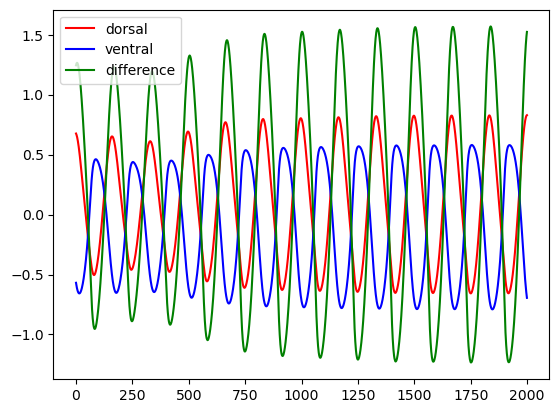

In [28]:
# x/(0.5 * 1.25 * (p80 - p20))
plt.plot(dorsal_slices[9, :], color='red', label='dorsal')
plt.plot(ventral_slices[9, :], color='blue', label='ventral')
plt.plot(dorsal_slices[9, :] - ventral_slices[9, :], color='green', label='difference')
plt.legend()
plt.show()

In [29]:
normed = dorsal_slices - ventral_slices
np.savetxt(f'Data/AVB_median_norm_{paramsAVB[curr_param][0]}.txt', normed, delimiter=",")

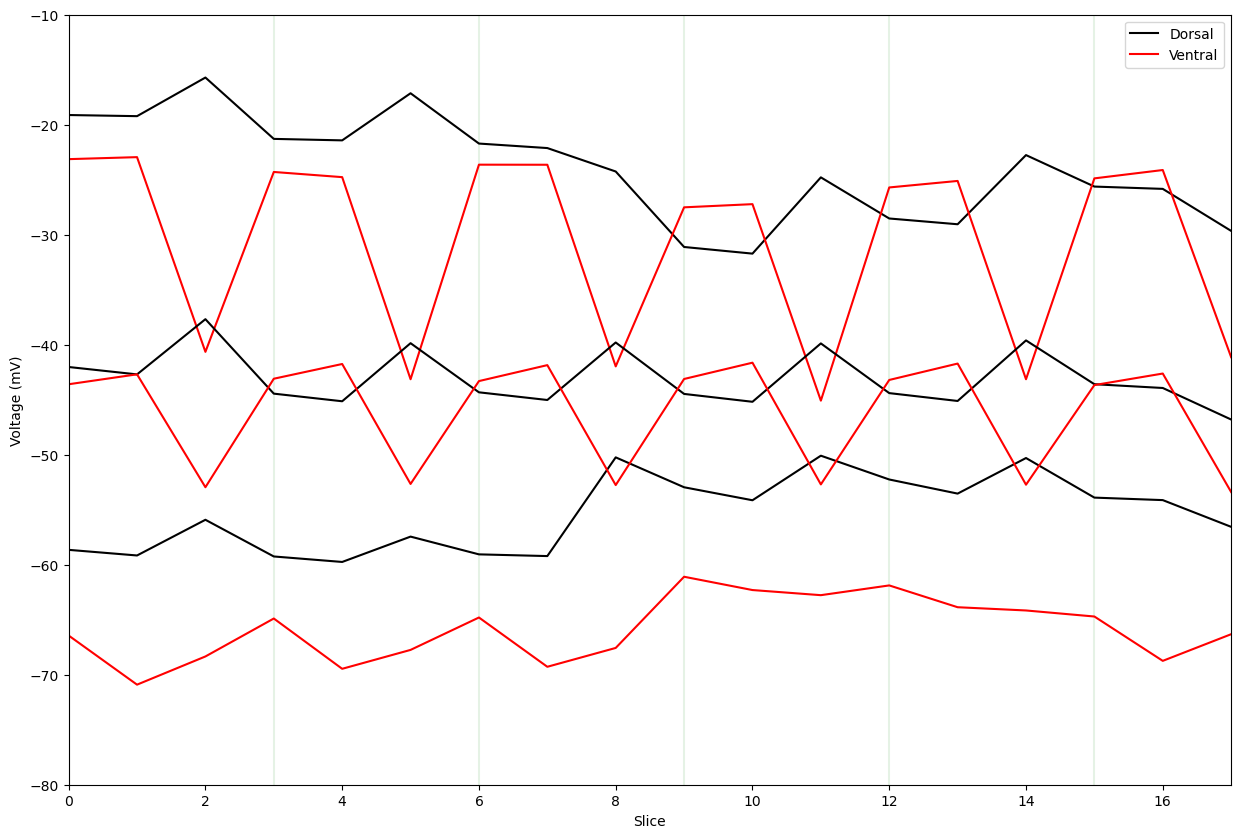

In [30]:
dorsal_max = np.max(dorsal_muscle_V[:, 200:], axis=1)
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)   
dorsal_avg = np.mean(dorsal_muscle_V[:, 200:], axis=1)
ventral_max = np.max(ventral_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)
ventral_avg = np.mean(ventral_muscle_V[:, 200:], axis=1)


plt.figure(figsize=(15, 10))
plt.vlines(range(0, 17, 3), ymin=-100, ymax=0, color="green", alpha=0.1)
plt.plot(dorsal_max, color="Black", label="Dorsal")
plt.plot(ventral_max, color="Red", label="Ventral")
plt.plot(dorsal_min, color="Black")
plt.plot(ventral_min, color="Red")
plt.plot(dorsal_avg, color="Black")
plt.plot(ventral_avg, color="Red")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 17)
plt.ylim(-80, -10)
plt.legend()

In [31]:
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)

In [32]:
dorsal_diff = np.array(dorsal_muscle_V[:, 200] - dorsal_min).reshape(18, 1)
ventral_diff = np.array(ventral_muscle_V[:, 200] - ventral_min).reshape(18, 1)

for i in range(399):
    dorsal_diff = np.append(dorsal_diff, np.subtract(dorsal_muscle_V[:, 200+i+1], dorsal_min).reshape(18, 1), axis=1)
    ventral_diff = np.append(ventral_diff, np.subtract(ventral_muscle_V[:, 200+i+1], ventral_min).reshape(18, 1), axis=1)

print(dorsal_diff.shape)
print(ventral_diff.shape)

(18, 400)
(18, 400)


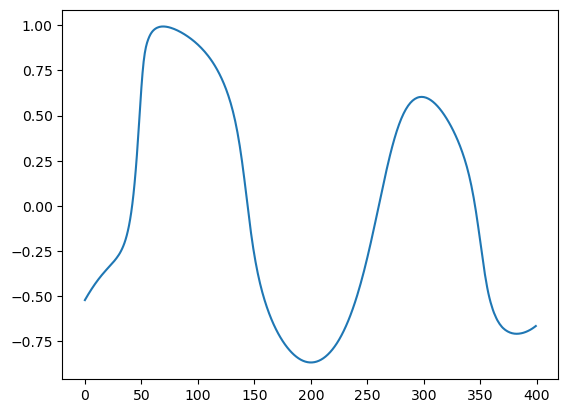

In [33]:
dorsal_strength = (dorsal_diff / (np.ones([18, 400]) * np.max(dorsal_diff, axis=1).reshape(18, 1))).reshape(18, 400)
ventral_strength = (ventral_diff / (np.ones([18, 400]) * np.max(ventral_diff, axis=1).reshape(18, 1))).reshape(18, 400)
plt.plot(dorsal_strength[0, :] - ventral_strength[0, :])
plt.show()

In [16]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal = np.array([])
final_ventral = np.array([])
for i in range(400):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength[j, i] * relative_strengths
        curr_ventral = ventral_strength[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal = next_step_dorsal
        final_ventral = next_step_ventral
    else:
        final_dorsal = np.append(final_dorsal, next_step_dorsal, axis=1)
        final_ventral = np.append(final_ventral, next_step_ventral, axis=1)

print(final_dorsal.shape)
print(final_ventral.shape)

(95, 400)
(95, 400)


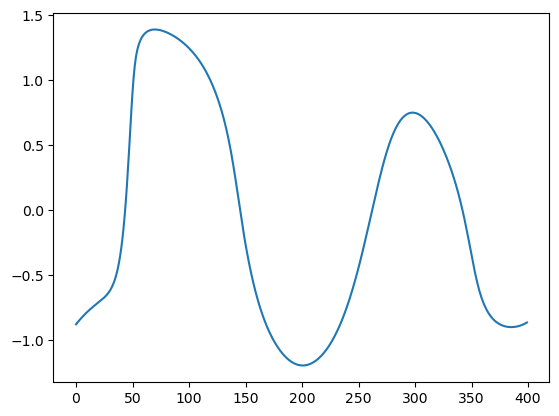

In [17]:
plt.plot(final_dorsal[10, :] - final_ventral[10, :])
plt.show()

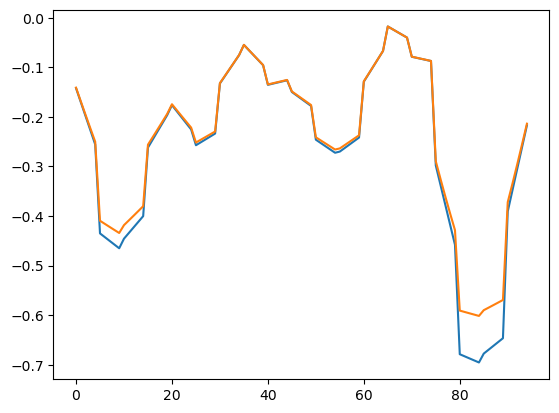

In [18]:
spot = 250
plt.plot(final_dorsal[:, spot] - final_ventral[:, spot])
plt.plot(np.tanh(final_dorsal[:, spot] - final_ventral[:, spot]))

In [19]:
out = np.array(np.tanh(final_dorsal - final_ventral))

In [20]:
np.savetxt(f'Data/AVA_neuro_muscle_{paramsAVA[curr_param][0]}.csv', final_dorsal, delimiter=',')

In [21]:
dorsal_avg = np.mean(dorsal_muscle_V, axis=1)
ventral_avg = np.mean(ventral_muscle_V, axis=1)

dorsal_diff_from_avg = np.array(dorsal_muscle_V[:, 400] - dorsal_avg).reshape(18, 1)
ventral_diff_from_avg = np.array(ventral_muscle_V[:, 400] - ventral_avg).reshape(18, 1)

for i in range(399):
    dorsal_diff_from_avg = np.append(dorsal_diff_from_avg, np.subtract(dorsal_muscle_V[:, 200+i+1], dorsal_avg).reshape(18, 1), axis=1)
    ventral_diff_from_avg = np.append(ventral_diff_from_avg, np.subtract(ventral_muscle_V[:, 200+i+1], ventral_avg).reshape(18, 1), axis=1)

print(dorsal_diff_from_avg.shape)
print(ventral_diff_from_avg.shape)
print(np.max(dorsal_diff_from_avg, axis=1))
print(np.max(ventral_diff_from_avg, axis=1))

(18, 400)
(18, 400)
[24.28322049 24.84942316 23.44945727 24.38080021 24.93499705 24.22379164
 23.99595046 24.23923571 14.82950989 11.35896445 11.4282185  13.20259658
 13.92542678 14.07338543 14.4498864  15.52884273 15.63222271 14.74306539]
[18.91927053 18.19823074 11.04550872 17.31558288 15.52750654  8.28810138
 18.1721929  16.7482205   9.55066908 17.25867329 16.44157648  8.65606073
 19.14913102 18.63789142 10.64148362 20.43582415 20.5122364  13.30063548]


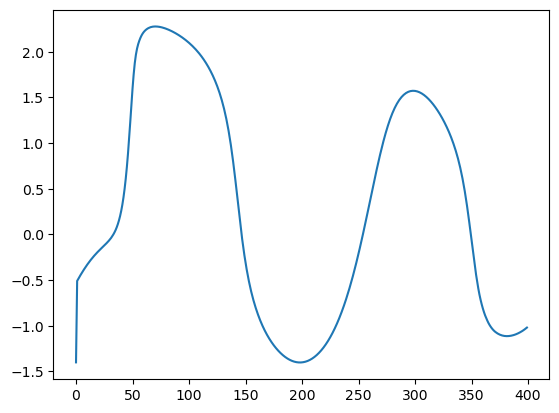

In [22]:
dorsal_strength_avg = (dorsal_diff_from_avg / (np.ones([18, 400]) * np.max(dorsal_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 400)
ventral_strength_avg = (ventral_diff_from_avg / (np.ones([18, 400]) * np.max(ventral_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 400)
plt.plot(dorsal_strength_avg[0, :] - ventral_strength_avg[0, :])
plt.show()


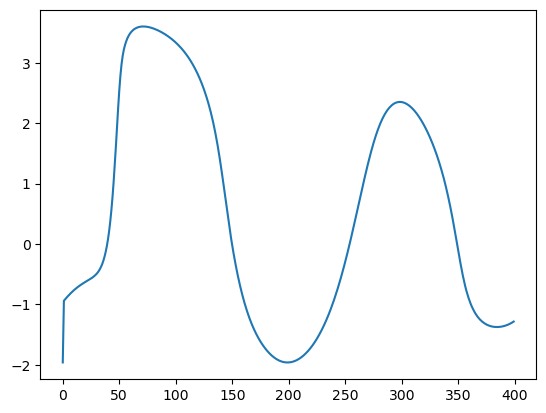

In [23]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal_avg = np.array([])
final_ventral_avg = np.array([])
for i in range(400):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength_avg[j, i] * relative_strengths
        curr_ventral = ventral_strength_avg[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal_avg = next_step_dorsal
        final_ventral_avg = next_step_ventral
    else:
        final_dorsal_avg = np.append(final_dorsal_avg, next_step_dorsal, axis=1)
        final_ventral_avg = np.append(final_ventral_avg, next_step_ventral, axis=1)

plt.plot(final_dorsal_avg[10, :] - final_ventral_avg[10, :])

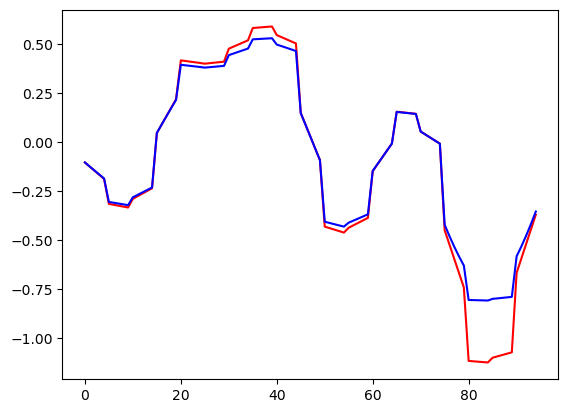

In [24]:
spot = 250
plt.plot(final_dorsal_avg[:, spot] - final_ventral_avg[:, spot], color="red")
plt.plot(np.tanh(final_dorsal_avg[:, spot] - final_ventral_avg[:, spot]), color="blue")
plt.show()

In [25]:
out = np.array(np.tanh(final_dorsal_avg - final_ventral_avg))
np.savetxt(f'Data/AVA_neuro_muscle_avg_{paramsAVB[curr_param][0]}.csv', out, delimiter=',')